In [5]:
import re
import pandas as pd
import copy
#import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import numpy as np
pio.templates.default ='plotly_white'

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sud4d\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Finding Messages
def getDatapoint(line):
    splitline = line.split('-')
    dateTime = splitline[0]
    date, time = dateTime.split(",")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message


In [7]:
sentiments = SentimentIntensityAnalyzer()#analyser built in the third party package

In [8]:
keyss=['pos','neg','neu','compound']
chc=0

In [9]:

def getgraph(conversation):
    grph=[]
    data=[]
    with open(conversation, encoding="utf-8") as fp:
        fp.readline()
        messageBuffer = []
        date, time, author = None, None, None
        while True:
            line = fp.readline()
            #print(line)
            if not line:
                break
            line = line.strip()
            #print(date_time(line))
            if len(line.strip().split('-')[0])>2 and line.strip().split('-')[0][-2]=='M':#date_time(line):
                if len(messageBuffer) > 0:
                    #print('hi')
                    data.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                try:
                    date, time, author, message = getDatapoint(line)
                    messageBuffer.append(message)
                except:
                    continue
            else:
                messageBuffer.append(line)
            #print("{}>>>>{}".format(messageBuffer,sentiments.polarity_scores(messageBuffer[0])))
            #print(sentiments.polarity_scores(messageBuffer[0])['compound'])pos,neg,neu,compound
            
            grph.append(sentiments.polarity_scores(messageBuffer[0])[keyss[chc]])
    print(keyss[chc])
    return (grph,data)

def gettrends(Data):
    Dx,Dy=None,None
    Ux,Uy=None,None
    data=np.array(Data)
    l=np.arange(0,len(data),1)
    
    Dx,Ux=l[(np.roll(data,-1)-data)<0],l[(np.roll(data,-1)-data)>0]
    Dy,Uy=copy.deepcopy(data[(np.roll(data,-1)-data)<0]),copy.deepcopy(data[(np.roll(data,-1)-data)>0])
    #print(data[(np.roll(data,-1)-data)>0])
    
    return {'up': (Ux,Uy),'down':(Dx,Dy)}
    #(l)

def plottrends(Datas):
    print("TRENDS")
    fig,ax=plt.subplots(2,3)
    s=3
    uds=[]
    for i in range(3):
        trd=gettrends(Datas[i])
        ax[0,i].scatter(trd['up'][0],trd['up'][1],color='green',alpha=0.6,s=s)
        ax[0,i].scatter(trd['down'][0],trd['down'][1],color='red',alpha=0.6,s=s)
        ax[0,i].plot(Datas[i],linestyle='dashed',alpha=0.3)
        ax[0,i].grid(which='major')
        ax[0,i].set_title("{} : (u,d) ({},{})".format(str(i),len(trd['up'][0]),len(trd['down'][0])))
        uds.append((len(trd['up'][0]),len(trd['down'][0])))
    for i in range(3):
        trd=gettrends(Datas[3+i])
        ax[1,i].scatter(trd['up'][0],trd['up'][1],color='green',alpha=0.6,s=s)
        ax[1,i].scatter(trd['down'][0],trd['down'][1],color='red',alpha=0.6,s=s)
        ax[1,i].plot(Datas[3+i],linestyle='dashed',alpha=0.3)
        ax[1,i].grid(which='major')
        ax[1,i].set_title("{} : (u,d) ({},{})".format(str(i+3),len(trd['up'][0]),len(trd['down'][0])))
        uds.append((len(trd['up'][0]),len(trd['down'][0])))
    return uds


In [25]:

def getdata():
    GP,D=[],[]
    for i in range(6):
        if i!=90 and i!=92:
            conversation='WhatsApp'+str(i+1)+'.txt'
        else:
            conversation='WhatsApp'+str(i+1)+'.1.txt'
        print(conversation)
        g,d=getgraph(conversation)
        GP.append(1*g)
        D.append(1*d)
    return (GP,D)

def getaveragedata(GP):
    EMF=[]
    for i in range(6):
        win=int(len(GP[i])/100)
    
        tmep=[]
        #print(">>>>>>>"+str(win))
        j=0
        while j<len(GP[i]):
            t=0
            #print(">>>>"+str(j))
            for l in range(win):
                if j+l<len(GP[i]):
                    t=t+GP[i][j+l]
            j=j+win
            #print("$$$"+str(j))
            tmep.append(t/win)
        EMF.append(1*tmep)
    return EMF

def normalise(data):
    Data=[]
    for i in range(len(data)):
        ma=max(data[i])
        Data.append([])
        for j in range(len(data[i])):
            Data[i].append(data[i][j]/ma)
    return Data


def EXTRACTDATA():
    EMF=[]
    GP=[]
    D=[]

    GP,D=getdata()
    EMF=getaveragedata(GP)
    NMF=normalise(EMF)
    return (GP,D,EMF,NMF)

In [26]:
chc=3
GP,D,EMF,NMF=EXTRACTDATA()

WhatsApp1.txt
compound
WhatsApp2.txt
compound
WhatsApp3.txt
compound
WhatsApp4.txt
compound
WhatsApp5.txt
compound
WhatsApp6.txt
compound


#####RAW$$(ABSOLUTELY OBJECTIVE)####compound


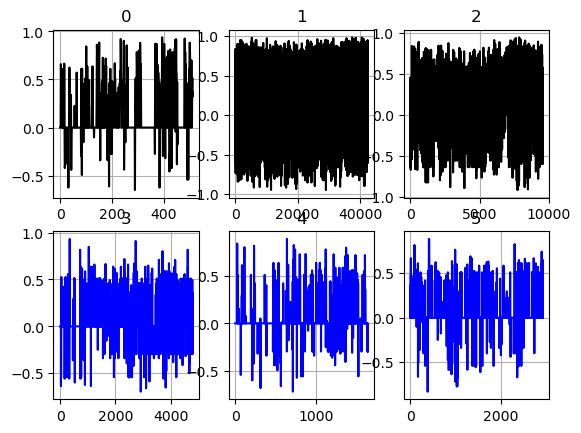

In [27]:

fig,ax=plt.subplots(2,3)
print("#####RAW$$(ABSOLUTELY OBJECTIVE)####"+str(keyss[chc]))
for i in range(3):
    ax[0,i].plot(GP[i],color='black')
    ax[0,i].grid(which='major')
    ax[0,i].set_title(str(i))
for i in range(3):
    ax[1,i].plot(GP[3+i],color='blue')
    ax[1,i].set_title(str(3+i))
    ax[1,i].grid(which='major')

######AVERAGE$$(EFFECTIVELY OBJECTIVE)#####compound


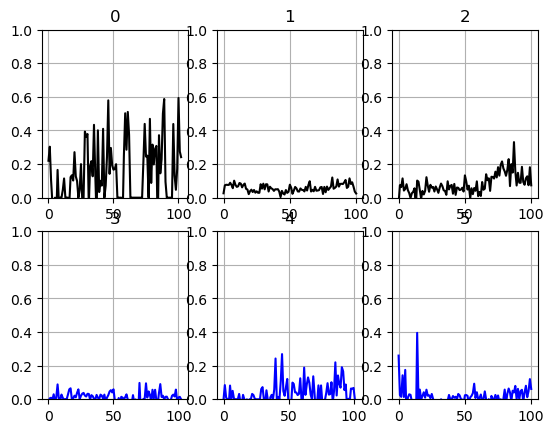

In [28]:

fig,ax=plt.subplots(2,3)
print("######AVERAGE$$(EFFECTIVELY OBJECTIVE)#####"+str(keyss[chc]))
for i in range(3):
    ax[0,i].plot(EMF[i],color='black')
    ax[0,i].grid(which='major')
    ax[0,i].set_title(str(i))
    ax[0,i].set_ylim((0,1.0))
for i in range(3):
    ax[1,i].plot(EMF[3+i],color='blue')
    ax[1,i].grid(which='major')
    ax[1,i].set_ylim((0,1.0))
    ax[1,i].set_title(str(3+i))

###NORMALISED$$$(SUBJECTIVE?)####compound


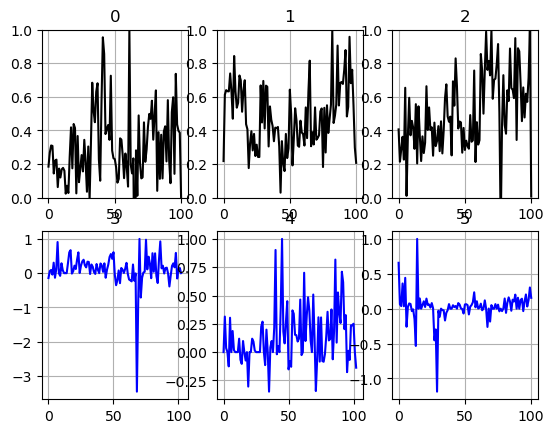

In [14]:
print("###NORMALISED$$$(SUBJECTIVE?)####"+str(keyss[chc]))
fig,ax=plt.subplots(2,3)
for i in range(3):
    ax[0,i].plot(NMF[i],color='black')
    ax[0,i].grid(which='major')
    ax[0,i].set_title(str(i))
    ax[0,i].set_ylim((0,1))
for i in range(3):
    ax[1,i].plot(NMF[3+i],color='blue')
    ax[1,i].grid(which='major')
    ax[1,i].set_title(str(3+i))

###FLUCTUATIONS$$####compound


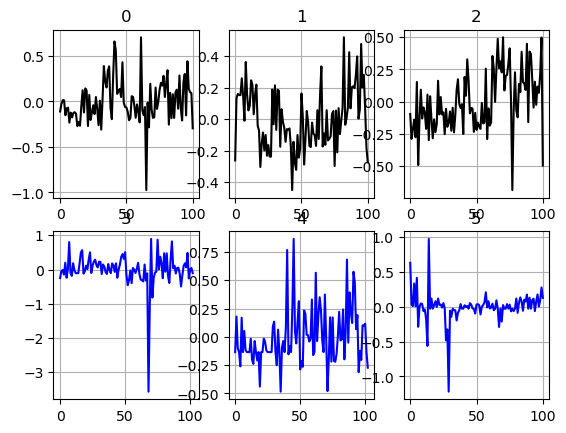

In [15]:
print("###FLUCTUATIONS$$####"+str(keyss[chc]))
fig,ax=plt.subplots(2,3)
for i in range(3):
    ax[0,i].plot(NMF[i]-np.mean(NMF[i]),color='black')
    ax[0,i].grid(which='major')
    ax[0,i].set_title(str(i))
    #ax[0,i].set_ylim((0,1))
for i in range(3):
    ax[1,i].plot(NMF[3+i]-np.mean(NMF[3+i]),color='blue')
    ax[1,i].grid(which='major')
    ax[1,i].set_title(str(3+i))

In [32]:
chc=0
GP,D,EMF,NMF=EXTRACTDATA()

WhatsApp1.txt
pos
WhatsApp2.txt
pos
WhatsApp3.txt
pos
WhatsApp4.txt
pos
WhatsApp5.txt
pos
WhatsApp6.txt
pos


###FLUCTUATION ABOUT MEAN####pos
0 skewness= 0.803801070222743
1 skewness= 0.16361087058209872
2 skewness= 0.6172911616258975
3 skewness= 0.8166071530473996
4 skewness= 1.2424141363937868
5 skewness= 3.5945537242718495


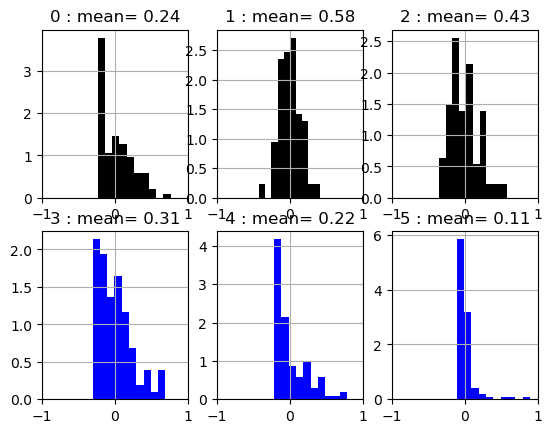

In [34]:
print("###FLUCTUATION ABOUT MEAN####"+str(keyss[chc]))
fig,ax=plt.subplots(2,3)
for i in range(3):
    #weights = np.ones_like(NMF[i]) / len(NMF[i])
    ax[0,i].hist((NMF[i]-np.mean(NMF[i])),color='black',density = True)#weights=weights)
    ax[0,i].grid(which='major')
    ax[0,i].set_xlim([-1,1])
    ax[0,i].set_title("{} : mean= {}".format(str(i),np.around(np.mean(NMF[i]),2)))
    d1=NMF[i]-np.mean(NMF[i])
    d2=np.sum((d1-np.mean(d1))**3/((len(d1)-1)*(np.std(d1)**3)))
    print("{} skewness= {}".format(i,d2))
for i in range(3):
    ax[1,i].hist((NMF[3+i]-np.mean(NMF[3+i])),color='blue',density = True)
    ax[1,i].grid(which='major')
    ax[1,i].set_xlim([-1,1])
    ax[1,i].set_title("{} : mean= {}".format(str(i+3),np.around(np.mean(NMF[3+i]),2)))
    d1=NMF[3+i]-np.mean(NMF[3+i])
    d2=np.sum((d1-np.mean(d1))**3/((len(d1)-1)*(np.std(d1)**3)))
    print("{} skewness= {}".format(i+3,d2))

In [18]:
def hypotester(uds,datas):#test hypothesis: (up-down) vs (mean or std or other) correlation?
    ms=[]
    dif=[]
    for i in range(len(datas)):
        #ms.append(np.mean(datas[i]))
        ms.append(np.mean(datas[i]-np.mean(datas[i])))
        #dif.append(np.mean(datas[i]))
        dif.append(uds[i][0]/uds[i][1])
    plt.scatter(ms,dif)
    plt.xlabel('Mean')
    plt.ylabel('up-down')
    plt.grid(which='major')
    plt.title(keyss[chc])
    plt.show()

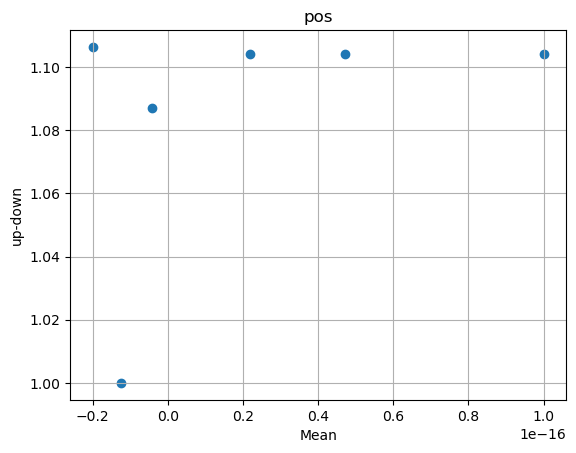

In [24]:
hypotester(uds,NMF)

TRENDS


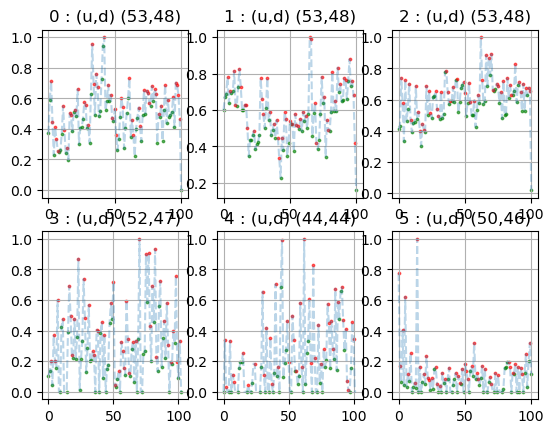

In [23]:
uds=plottrends(NMF)

In [35]:
def barana(data):
    df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])##making dataframe
    df['Date'] = pd.to_datetime(df['Date'])
    senti = df.dropna()
    data=df.dropna()
    senti["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
    senti["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
    senti["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
    senti["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["Message"]]
    SENTI=senti.groupby('Author').agg({"Positive":'sum',"Negative":'sum',"Neutral":'sum',"Compound":'sum'}).reset_index()
    fig = go.Figure()
    fig.add_trace(go.Bar(x=SENTI["Author"],y=SENTI["Positive"], name='Positive'))
    #fig.add_trace(go.Bar(x=SENTI["Author"],y=SENTI["Neutral"], name='Neutral'))
    fig.add_trace(go.Bar(x=SENTI["Author"],y=SENTI["Negative"], name='Negative'))
    fig.add_trace(go.Bar(x=SENTI["Author"],y=SENTI["Compound"], name='Compound'))
    #fig.add_trace(go.Bar(x=customers.reset_index()['Segment'],y=customers.reset_index()['Profit'], name='Profit'))
    #fig.add_trace(go.Bar(x=tscs['Segment'],y=tscs['ratio'],name='ratio'))

    #fig.update_layout(title='Sales and Profit Analysis by Customer Segment',xaxis_title='Customer Segment', yaxis_title='Amount')

    fig.show()